In [1]:
import saspy
sas = saspy.SASsession(cfgname='oda')
# sas_html = saspy.SASsession(cfgname='oda', results='HTML')

SAS Connection established. Subprocess id is 18068



In [10]:
import pandas as pd
import numpy as np

In [2]:
cars = sas.sasdata('cars', libref='sashelp')

### The sasdata class

In [46]:
print(type(cars))
cars

<class 'saspy.sasdata.SASdata'>


Libref  = sashelp
Table   = cars
Dsopts  = {}
Results = Pandas

In [47]:
methods = []
for i in cars.__dir__():
    if not i.startswith('_'):
        methods.append(i)

methods.sort()

print(f"{len(methods) = }")

import math

def print_dir_style(lst, num_columns):
    max_len = max(len(item) for item in lst)
    num_rows = math.ceil(len(lst) / num_columns)

    # Create a list of lists, where each sub-list is a column in the output
    columns = [lst[i : i + num_rows] for i in range(0, len(lst), num_rows)]

    # Pad each string in each column to the max length so they line up correctly
    for col in columns:
        for i in range(len(col)):
            col[i] = col[i].ljust(max_len)

    # Print each row
    for i in range(num_rows):
        for col in columns:
            if i < len(col):
                print(col[i], end=" ")
        print()

print_dir_style(methods, 5)

len(methods) = 40
HTML        describe    libref      scatter     to_csv      
add_vars    dsopts      means       score       to_df       
append      engine      modify      series      to_df_CSV   
assessModel head        obs         set_results to_df_DISK  
bar         heatmap     partition   sort        to_frame    
columnInfo  hist        rename      table       to_json     
contents    impute      results     tabulate    top         
delete      info        sas         tail        where       


In [29]:
cars.assessModel(target = "msrp", prediction="invoice")

No event was specified for a nominal target. Here are possible options:



c:\Users\yzdom\AppData\Local\Programs\Python\Python312\Lib\site-packages\saspy\sasioiom.py:1056: UserWarning: Noticed 'ERROR:' in LOG, you ought to take a look and see if there was a problem
  warnings.warn("Noticed 'ERROR:' in LOG, you ought to take a look and see if there was a problem")


In [42]:
res = cars.contents()
type(res)

dict

In [44]:
res['Attributes']

,Member,Label1,cValue1,nValue1,Label2,cValue2,nValue2
0,SASHELP.CARS,Data Set Name,SASHELP.CARS,NaN,Observations,428,428.0
1,SASHELP.CARS,Member Type,DATA,NaN,Variables,15,15.0
2,SASHELP.CARS,Engine,V9,NaN,Indexes,0,0.0
3,SASHELP.CARS,Created,08/06/2020 01:11:21,1.912295e+09,Observation Length,152,152.0
4,SASHELP.CARS,Last Modified,08/06/2020 01:11:21,1.912295e+09,Deleted Observations,0,0.0
5,SASHELP.CARS,Protection,NaN,NaN,Compressed,NO,NaN
6,SASHELP.CARS,Data Set Type,NaN,NaN,Sorted,YES,NaN
7,SASHELP.CARS,Label,2004 Car Data,NaN,NaN,NaN,0.0
8,SASHELP.CARS,Data Representation,"SOLARIS_X86_64, LINUX_X86_64, ALPHA_TRU64, LIN...",NaN,NaN,NaN,0.0
9,SASHELP.CARS,Encoding,us-ascii ASCII (ANSI),NaN,NaN,NaN,0.0


In [45]:
res['Enginehost']

,Member,Label1,cValue1,nValue1
0,SASHELP.CARS,Data Set Page Size,65536,65536.0
1,SASHELP.CARS,Number of Data Set Pages,2,2.0
2,SASHELP.CARS,First Data Page,1,1.0
3,SASHELP.CARS,Max Obs per Page,430,430.0
4,SASHELP.CARS,Obs in First Data Page,405,405.0
5,SASHELP.CARS,Number of Data Set Repairs,0,0.0
6,SASHELP.CARS,Filename,/pbr/sfw/sas/940/SASFoundation/9.4/sashelp/car...,NaN
7,SASHELP.CARS,Release Created,9.0401M7,NaN
8,SASHELP.CARS,Host Created,Linux,NaN
9,SASHELP.CARS,Inode Number,134530653,134530653.0


In [46]:
res['Variables']

,Member,Num,Variable,Type,Len,Pos,Format,Label
0,SASHELP.CARS,9.0,Cylinders,Num,8.0,24.0,NaN,NaN
1,SASHELP.CARS,5.0,DriveTrain,Char,5.0,147.0,NaN,NaN
2,SASHELP.CARS,8.0,EngineSize,Num,8.0,16.0,NaN,Engine Size (L)
3,SASHELP.CARS,10.0,Horsepower,Num,8.0,32.0,NaN,NaN
4,SASHELP.CARS,7.0,Invoice,Num,8.0,8.0,DOLLAR8.,NaN
5,SASHELP.CARS,15.0,Length,Num,8.0,72.0,NaN,Length (IN)
6,SASHELP.CARS,11.0,MPG_City,Num,8.0,40.0,NaN,MPG (City)
7,SASHELP.CARS,12.0,MPG_Highway,Num,8.0,48.0,NaN,MPG (Highway)
8,SASHELP.CARS,6.0,MSRP,Num,8.0,0.0,DOLLAR8.,NaN
9,SASHELP.CARS,1.0,Make,Char,13.0,80.0,NaN,NaN


In [47]:
res['Sortedby']

,Member,Label1,cValue1,nValue1
0,SASHELP.CARS,Sortedby,Make Type,NaN
1,SASHELP.CARS,Validated,YES,NaN
2,SASHELP.CARS,Character Set,ANSI,NaN


In [ ]:
wkcars.delete()

In [ ]:
engine

In [ ]:
impute

In [ ]:
modify

In [ ]:
partition

In [ ]:
rename

In [ ]:
results

In [ ]:
series

In [ ]:
set_results

In [ ]:
sort

In [ ]:
table

In [ ]:
tabulate

In [ ]:
where

### attributes

In [33]:
cars.HTML

0

In [34]:
cars.libref

'sashelp'

In [ ]:
cars.dsopts

{}

In [35]:
cars.sas

Access Method         = IOM
SAS Config name       = oda
SAS Config file       = C:\Users\yzdom/.config/saspy\sascfg_personal.py
WORK Path             = /saswork/SAS_workAE6F0001C335_odaws02-apse1-2.oda.sas.com/SAS_work4AC50001C335_odaws02-apse1-2.oda.sas.com/
SAS Version           = 9.04.01M7P08062020
SASPy Version         = 5.6.0
Teach me SAS          = False
Batch                 = False
Results               = Pandas
SAS Session Encoding  = utf-8
Python Encoding value = utf-8
SAS process Pid value = 115509


### metadata

In [ ]:
cars.columnInfo()

,Member,Num,Variable,Type,Len,Pos,Format,Label
0,SASHELP.CARS,9.0,Cylinders,Num,8.0,24.0,NaN,NaN
1,SASHELP.CARS,5.0,DriveTrain,Char,5.0,147.0,NaN,NaN
2,SASHELP.CARS,8.0,EngineSize,Num,8.0,16.0,NaN,Engine Size (L)
3,SASHELP.CARS,10.0,Horsepower,Num,8.0,32.0,NaN,NaN
4,SASHELP.CARS,7.0,Invoice,Num,8.0,8.0,DOLLAR8.,NaN
5,SASHELP.CARS,15.0,Length,Num,8.0,72.0,NaN,Length (IN)
6,SASHELP.CARS,11.0,MPG_City,Num,8.0,40.0,NaN,MPG (City)
7,SASHELP.CARS,12.0,MPG_Highway,Num,8.0,48.0,NaN,MPG (Highway)
8,SASHELP.CARS,6.0,MSRP,Num,8.0,0.0,DOLLAR8.,NaN
9,SASHELP.CARS,1.0,Make,Char,13.0,80.0,NaN,NaN


In [ ]:
cars.info()

,Type,Variable,N,Nmiss
0,char,Make,428.0,0.0
1,char,Model,428.0,0.0
2,char,Type,428.0,0.0
3,char,Origin,428.0,0.0
4,char,DriveTrain,428.0,0.0
5,numeric,MSRP,428.0,0.0
6,numeric,Invoice,428.0,0.0
7,numeric,EngineSize,428.0,0.0
8,numeric,Cylinders,428.0,2.0
9,numeric,Horsepower,428.0,0.0


### looking at records

In [37]:
cars.obs()

428

In [ ]:
cars.head()

Obs,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
1,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6,265,17,23,4451,106,189
2,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4,200,24,31,2778,101,172
3,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4,200,22,29,3230,105,183
4,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6,270,20,28,3575,108,186
5,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6,225,18,24,3880,115,197


In [ ]:
cars.tail()

Obs,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
424,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,"$40,565","$38,203",2.4,5,197,21,28,3450,105,186
425,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,"$42,565","$40,083",2.3,5,242,20,26,3450,105,186
426,Volvo,S80 T6 4dr,Sedan,Europe,Front,"$45,210","$42,573",2.9,6,268,19,26,3653,110,190
427,Volvo,V40,Wagon,Europe,Front,"$26,135","$24,641",1.9,4,170,22,29,2822,101,180
428,Volvo,XC70,Wagon,Europe,All,"$35,145","$33,112",2.5,5,208,20,27,3823,109,186


### summary statistics

In [ ]:
cars.describe()

Variable,Label,N,N Miss,Median,Mean,Std Dev,Minimum,25th Pctl,50th Pctl,75th Pctl,Maximum
MSRP,,428,0,27635,32775,19432,10280,20330,27635,39215,192465
Invoice,,428,0,25295,30015,17642,9875.000000,18851,25295,35733,173560
EngineSize,Engine Size (L),428,0,3.000000,3.196729,1.108595,1.300000,2.350000,3.000000,3.900000,8.300000
Cylinders,,426,2,6.000000,5.807512,1.558443,3.000000,4.000000,6.000000,6.000000,12.000000
Horsepower,,428,0,210.000000,215.885514,71.836032,73.000000,165.000000,210.000000,255.000000,500.000000
MPG_City,MPG (City),428,0,19.000000,20.060748,5.238218,10.000000,17.000000,19.000000,21.500000,60.000000
MPG_Highway,MPG (Highway),428,0,26.000000,26.843458,5.741201,12.000000,24.000000,26.000000,29.000000,66.000000
Weight,Weight (LBS),428,0,3474.500000,3577.953271,758.983215,1850.000000,3103.000000,3474.500000,3978.500000,7190.000000
Wheelbase,Wheelbase (IN),428,0,107.000000,108.154206,8.311813,89.000000,103.000000,107.000000,112.000000,144.000000
Length,Length (IN),428,0,187.000000,186.362150,14.357991,143.000000,178.000000,187.000000,194.000000,238.000000


In [ ]:
cars.means()

,Variable,Label,N,NMiss,Median,Mean,StdDev,Min,P25,P50,P75,Max
0,MSRP,NaN,428.0,0.0,27635.0,32774.855140,19431.716674,10280.0,20329.50,27635.0,39215.0,192465.0
1,Invoice,NaN,428.0,0.0,25294.5,30014.700935,17642.117750,9875.0,18851.00,25294.5,35732.5,173560.0
2,EngineSize,Engine Size (L),428.0,0.0,3.0,3.196729,1.108595,1.3,2.35,3.0,3.9,8.3
3,Cylinders,NaN,426.0,2.0,6.0,5.807512,1.558443,3.0,4.00,6.0,6.0,12.0
4,Horsepower,NaN,428.0,0.0,210.0,215.885514,71.836032,73.0,165.00,210.0,255.0,500.0
5,MPG_City,MPG (City),428.0,0.0,19.0,20.060748,5.238218,10.0,17.00,19.0,21.5,60.0
6,MPG_Highway,MPG (Highway),428.0,0.0,26.0,26.843458,5.741201,12.0,24.00,26.0,29.0,66.0
7,Weight,Weight (LBS),428.0,0.0,3474.5,3577.953271,758.983215,1850.0,3103.00,3474.5,3978.5,7190.0
8,Wheelbase,Wheelbase (IN),428.0,0.0,107.0,108.154206,8.311813,89.0,103.00,107.0,112.0,144.0
9,Length,Length (IN),428.0,0.0,187.0,186.362150,14.357991,143.0,178.00,187.0,194.0,238.0


In [ ]:
cars.top("Horsepower")

,Horsepower,COUNT,PERCENT
0,200.0,17.0,3.971963
1,210.0,14.0,3.271028
2,215.0,14.0,3.271028
3,225.0,13.0,3.037383
4,240.0,13.0,3.037383
5,140.0,12.0,2.803738
6,220.0,12.0,2.803738
7,170.0,11.0,2.570093
8,300.0,11.0,2.570093
9,130.0,10.0,2.336449


### transformations

In [ ]:
wkcars = sas.sasdata('wkcars')
cars.add_vars({'PW_ratio': 'weight / horsepower', 'Overhang' : 'length - wheelbase'}, wkcars)
wkcars.head()

Table WORK.wkcars does not exist. This SASdata object will not be useful until the data set is created.

23                                                         The SAS System                      Wednesday, April  3, 2024 11:58:00 AM

130        
131        data WORK.'wkcars'n ; set sashelp.'cars'n ;
132        PW_ratio = weight / horsepower;
133        Overhang = length - wheelbase;
134        ; run;
135        
136        
137        

24                                                         The SAS System                      Wednesday, April  3, 2024 11:58:00 AM

138        


,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,PW_ratio,Overhang
0,Acura,MDX,SUV,Asia,All,36945.0,33337.0,3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0,16.796226,83.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,21761.0,2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0,13.890000,71.0
2,Acura,TSX 4dr,Sedan,Asia,Front,26990.0,24647.0,2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0,16.150000,78.0
3,Acura,TL 4dr,Sedan,Asia,Front,33195.0,30299.0,3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0,13.240741,78.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755.0,39014.0,3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0,17.244444,82.0


In [ ]:
wkcars = sas.sasdata('wkcars')
cars.score(code="""
    score = msrp + 1000 * horsepower - 100 * weight;
""", out=wkcars)
wkcars.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,score
0,Acura,MDX,SUV,Asia,All,36945.0,33337.0,3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0,-143155.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,21761.0,2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0,-53980.0
2,Acura,TSX 4dr,Sedan,Asia,Front,26990.0,24647.0,2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0,-96010.0
3,Acura,TL 4dr,Sedan,Asia,Front,33195.0,30299.0,3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0,-54305.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755.0,39014.0,3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0,-119245.0


In [ ]:
df = cars.to_df().loc[:1]
tmp = sas.df2sd(df, 'tmp')
tmp.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945.0,33337.0,3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,21761.0,2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0


In [ ]:
tmp.append(df)
tmp.head()


255                                                        The SAS System                      Wednesday, April  3, 2024 11:58:00 AM

1985       
1986       proc append base=WORK.'tmp'n
1987                   data=WORK.'_temp_df'n;
1988       run;
1989       
1990       
1991       

256                                                        The SAS System                      Wednesday, April  3, 2024 11:58:00 AM

1992       


,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945.0,33337.0,3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,21761.0,2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,MDX,SUV,Asia,All,36945.0,33337.0,3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
3,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,21761.0,2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0


### plots


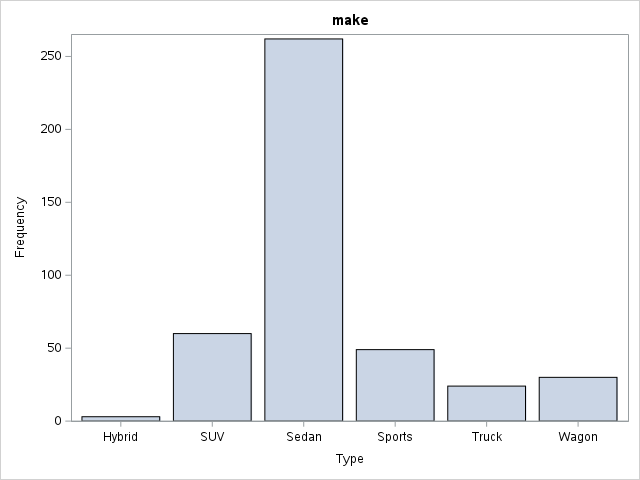

In [34]:
cars.bar(var='type', title='make')


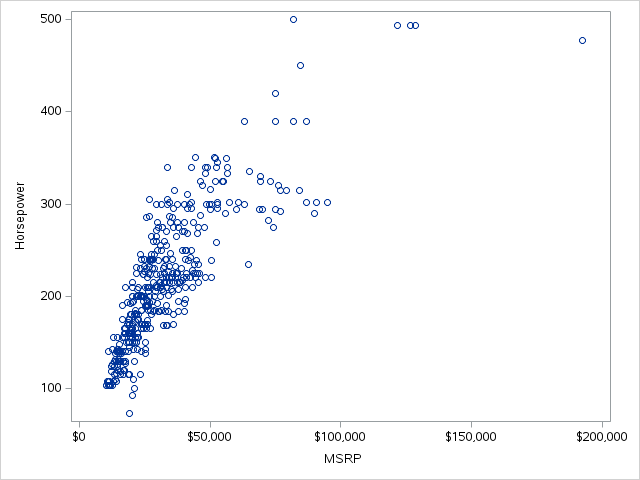

In [56]:
cars.scatter("msrp", "horsepower")


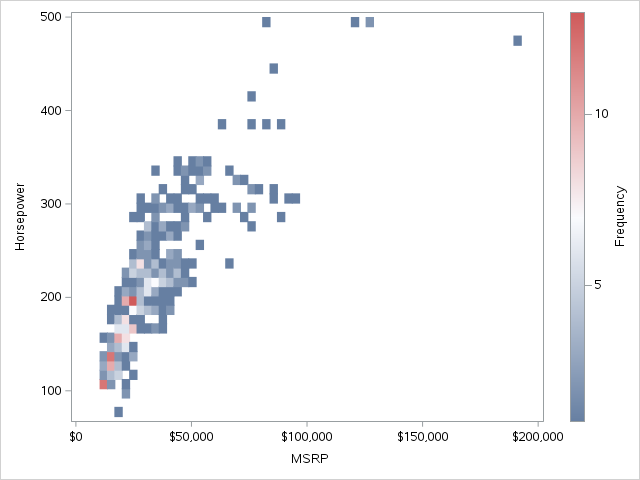

In [ ]:
cars.heatmap('msrp','horsepower')


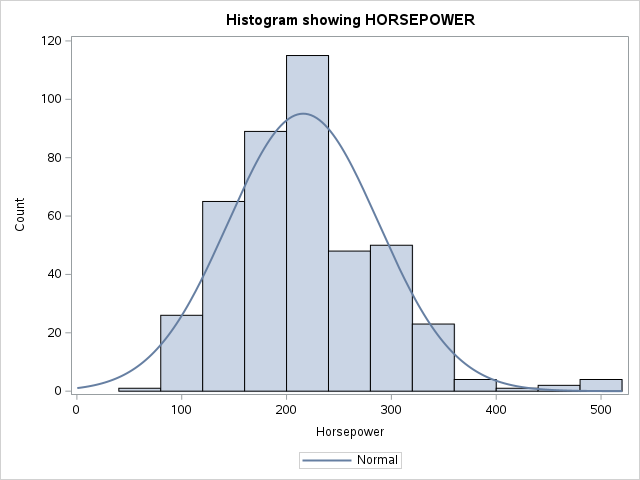


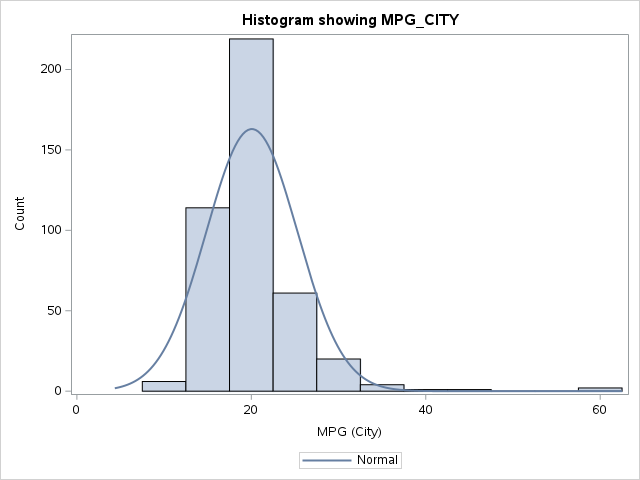


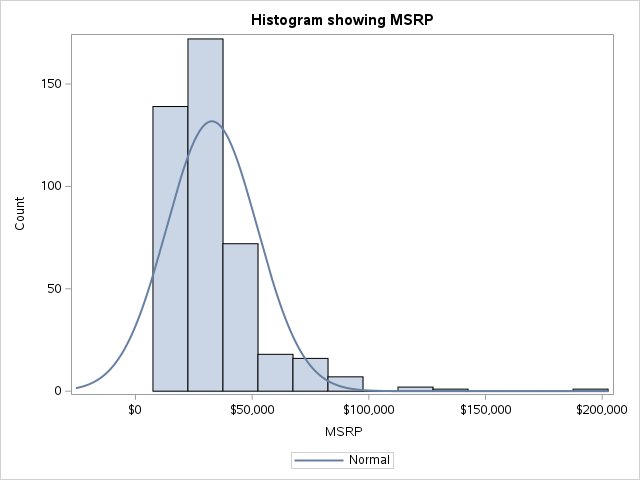

In [ ]:
for col in ['horsepower','MPG_City', 'MSRP']:
    cars.hist(col, title='Histogram showing '+col.upper())

### tos

to_csv
to_df
to_df_CSV
to_df_DISK
to_frame
to_json